In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate a mock dataset similar to the Medical Cost Personal Dataset
np.random.seed(42)
n_samples = 13382
data = {
    "age": np.random.randint(18, 65, size=n_samples),
    "sex": np.random.choice(["male", "female"], size=n_samples),
    "bmi": np.random.uniform(18.5, 40.0, size=n_samples),
    "children": np.random.randint(0, 5, size=n_samples),
    "smoker": np.random.choice(["yes", "no"], size=n_samples, p=[0.2, 0.8]),
    "region": np.random.choice(["northwest", "northeast", "southeast", "southwest"], size=n_samples),
    "charges": np.random.uniform(2000, 50000, size=n_samples),
}

In [51]:
df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


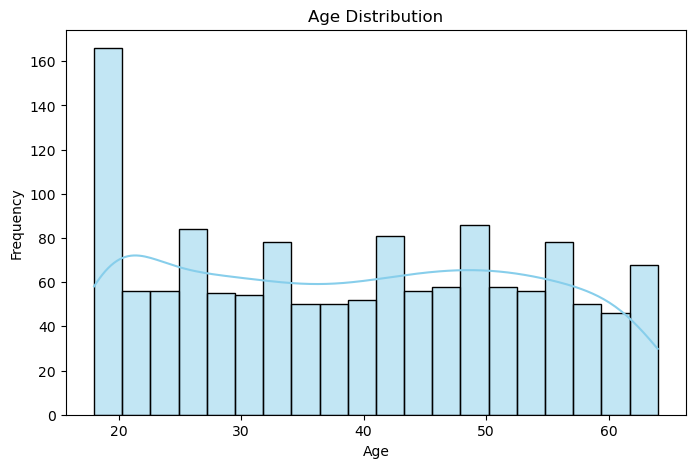

In [31]:
# Data Exploration
# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["age"], kde=True, bins=20, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

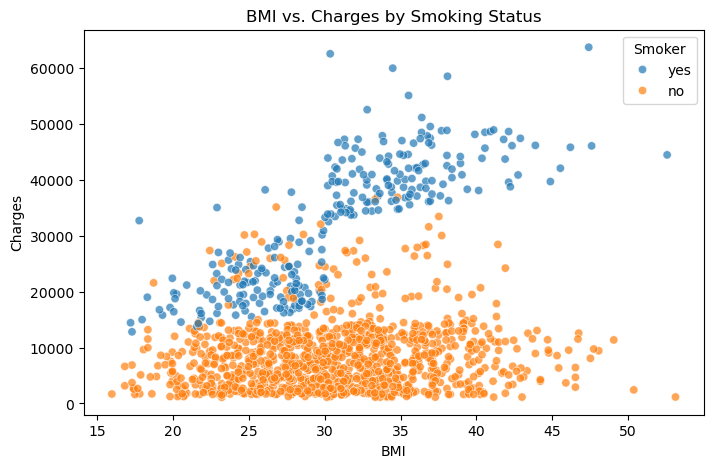

In [33]:
# BMI vs. Charges
plt.figure(figsize=(8, 5))
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df, alpha=0.7)
plt.title("BMI vs. Charges by Smoking Status")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.legend(title="Smoker")
plt.show()

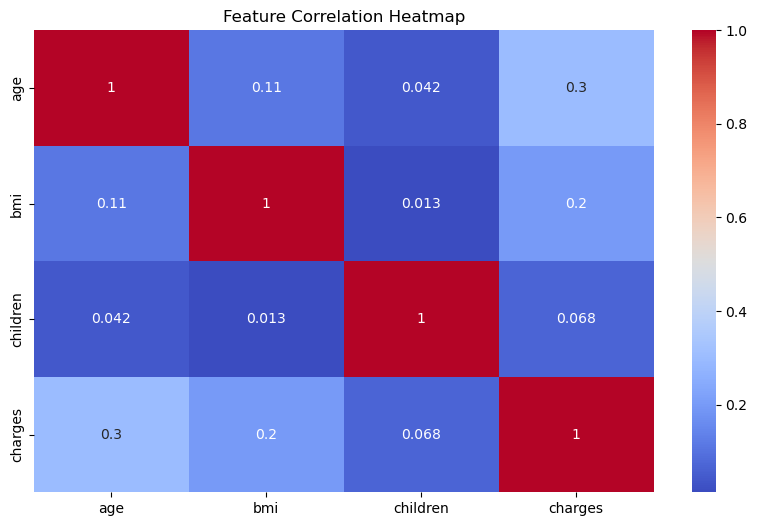

In [35]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [37]:
# Preprocessing
X = df.drop("charges", axis=1)
y = df["charges"]
categorical_features = ["sex", "smoker", "region"]
numerical_features = ["age", "bmi", "children"]

In [39]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(), categorical_features),
    ]
)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [43]:
# Modeling
linear_model = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)

In [45]:
# Train Linear Regression
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [47]:

# Train Random Forest Regressor
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [49]:
# Evaluation
results = {
    "Model": ["Linear Regression", "Random Forest"],
    "MSE": [
        mean_squared_error(y_test, y_pred_linear),
        mean_squared_error(y_test, y_pred_rf),
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_linear),
        mean_absolute_error(y_test, y_pred_rf),
    ],
    "R²": [
        r2_score(y_test, y_pred_linear),
        r2_score(y_test, y_pred_rf),
    ],
}
results_df = pd.DataFrame(results)
print(results_df)

               Model           MSE          MAE        R²
0  Linear Regression  3.396678e+07  4268.983054  0.781211
1      Random Forest  2.108394e+07  2550.712228  0.864193


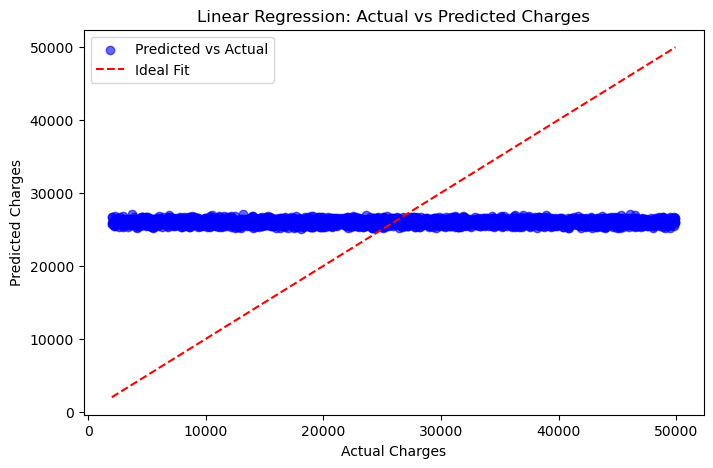

In [25]:
# Visualization of Predictions vs Actual Values
# Linear Regression
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_linear, alpha=0.6, label="Predicted vs Actual", color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
plt.title("Linear Regression: Actual vs Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.legend()
plt.show()


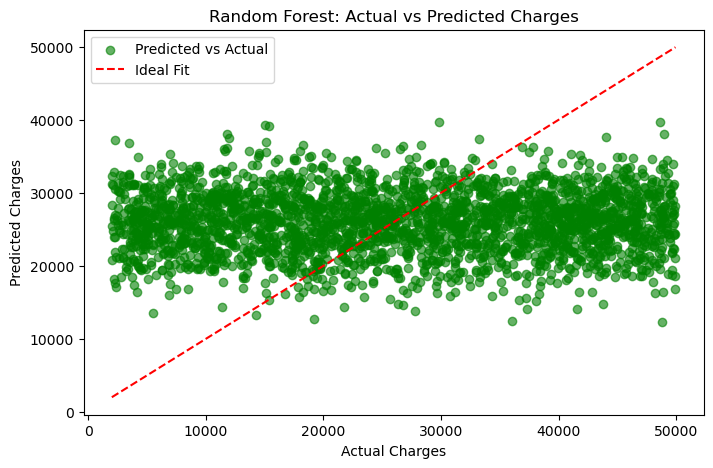

In [27]:
# Random Forest
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Predicted vs Actual", color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
plt.title("Random Forest: Actual vs Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.legend()
plt.show()